<a href="https://colab.research.google.com/github/schizohub/PyTorch_lessons/blob/main/pytorch_3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
len(X),len(y)

(1000, 1000)

In [4]:
import pandas as pd

print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
circles = pd.DataFrame({'X1': X[:,0],
                        'X2':X[:,1],
                        'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


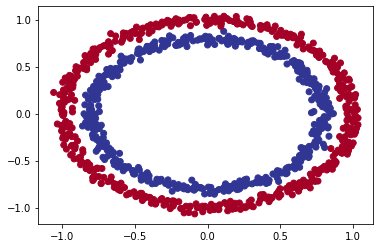

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [8]:
import torch
torch.__version__

'1.13.1+cu116'

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y, 
                                                   test_size=0.25, 
                                                   random_state=42)


In [11]:
len(X_train),len(X_test), len(y_train),len(y_test)

(750, 250, 750, 250)

In [12]:
from torch import nn

device =  'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
X_train

tensor([[-0.9137, -0.3741],
        [ 0.1428,  0.8240],
        [-0.3245, -0.9184],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [14]:
#1.Construct a modl that subclasses nn.Module
class NNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn.Linear layer capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)
    #3. Define a forward() method that outlines the forward pass    
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2 -> output

#4. Instantiate an instance of our model class and send it to the target device
model_0 = NNClassifier().to(device)

model_0

NNClassifier(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.1549, -0.5511],
                      [ 0.6534, -0.2567],
                      [ 0.2838, -0.4296],
                      [ 0.1293, -0.5171],
                      [-0.3185, -0.3429]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1223, -0.2012, -0.5964,  0.2262, -0.5785], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0834,  0.3764, -0.0840, -0.3535,  0.0270]], device='cuda:0')),
             ('1.bias', tensor([-0.0999], device='cuda:0'))])

In [18]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"First 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

First 10 predictions:
tensor([[-0.2232],
        [-0.1442],
        [-0.3408],
        [-0.1903],
        [-0.1984],
        [-0.1513],
        [-0.0415],
        [-0.0428],
        [-0.3466],
        [-0.1373]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [19]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.3)

In [20]:
def accuracy_func(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [21]:
model_0.eval()
with torch.inference_mode():
     y_logits = model_0(X_test.to(device))[:10]
y_logits

tensor([[-0.2232],
        [-0.1442],
        [-0.3408],
        [-0.1903],
        [-0.1984],
        [-0.1513],
        [-0.0415],
        [-0.0428],
        [-0.3466],
        [-0.1373]], device='cuda:0')

In [22]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4444],
        [0.4640],
        [0.4156],
        [0.4526],
        [0.4506],
        [0.4623],
        [0.4896],
        [0.4893],
        [0.4142],
        [0.4657]], device='cuda:0')

In [23]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

In [24]:
torch.manual_seed(42)

epochs = 300

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, 
                   y_train)
    acc = accuracy_func(y_train,
                        y_pred)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():

        test_logits = model_0(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,
                            y_test)
        
        acc_test = accuracy_func(y_test,
                                 test_pred)
        
    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {acc_test:.2f}%")

Epoch: 0 | Loss: 0.70064 | Acc: 49.47% | Test loss: 0.69763 | Test acc: 51.60%
Epoch: 10 | Loss: 0.69372 | Acc: 50.40% | Test loss: 0.69621 | Test acc: 48.40%
Epoch: 20 | Loss: 0.69327 | Acc: 51.20% | Test loss: 0.69626 | Test acc: 48.00%
Epoch: 30 | Loss: 0.69313 | Acc: 51.73% | Test loss: 0.69599 | Test acc: 48.00%
Epoch: 40 | Loss: 0.69305 | Acc: 52.40% | Test loss: 0.69572 | Test acc: 47.20%
Epoch: 50 | Loss: 0.69300 | Acc: 52.27% | Test loss: 0.69551 | Test acc: 48.80%
Epoch: 60 | Loss: 0.69296 | Acc: 51.87% | Test loss: 0.69535 | Test acc: 48.00%
Epoch: 70 | Loss: 0.69295 | Acc: 51.73% | Test loss: 0.69522 | Test acc: 48.80%
Epoch: 80 | Loss: 0.69293 | Acc: 51.87% | Test loss: 0.69513 | Test acc: 48.80%
Epoch: 90 | Loss: 0.69293 | Acc: 52.13% | Test loss: 0.69506 | Test acc: 48.40%
Epoch: 100 | Loss: 0.69292 | Acc: 52.13% | Test loss: 0.69500 | Test acc: 48.40%
Epoch: 110 | Loss: 0.69292 | Acc: 52.53% | Test loss: 0.69496 | Test acc: 48.40%
Epoch: 120 | Loss: 0.69292 | Acc: 52.13

In [25]:
import requests
from pathlib import Path 

if Path('helper_functions.py').is_file():
    print("File already exists")
else:
    print("Download them")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

Download them


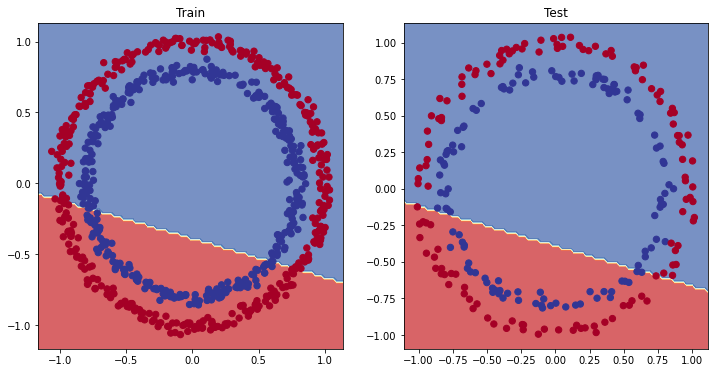

In [26]:
# plot_decision_boundary()
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [27]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
loss_fn_1 = nn.BCEWithLogitsLoss()

optimizer_1 = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.1)

In [29]:
epochs = 1000

for epoch in range(epochs):

    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn_1(y_logits, 
                   y_train)
    acc = accuracy_func(y_train,
                        y_pred)
    
    optimizer_1.zero_grad()

    loss.backward()

    optimizer_1.step()

    model_1.eval()

    with torch.inference_mode():

        test_logits = model_1(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn_1(test_logits,
                            y_test)
        
        acc_test = accuracy_func(y_test,
                                 test_pred)
        
    if epoch%100==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {acc_test:.2f}%")

Epoch: 0 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 100 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 200 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 300 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 400 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 500 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 600 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 700 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 800 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%
Epoch: 900 | Loss: 0.69377 | Acc: 51.07% | Test loss: 0.69343 | Test acc: 50.40%


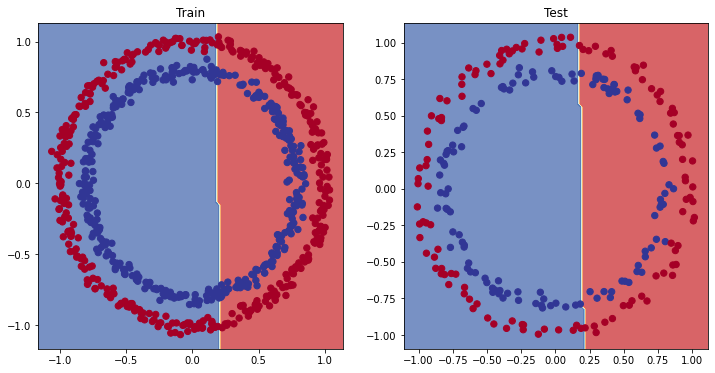

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [52]:
weight = 0.56
bias = 0.75
start = 0
end = 1
spread=0.01

X = torch.arange(start,end,spread).unsqueeze(dim=1)
y = weight*X+bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]), tensor([[0.7500],
         [0.7556],
         [0.7612],
         [0.7668],
         [0.7724],
         [0.7780],
         [0.7836],
         [0.7892],
         [0.7948],
         [0.8004]]))

In [43]:
split = int(0.8*len(X))

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

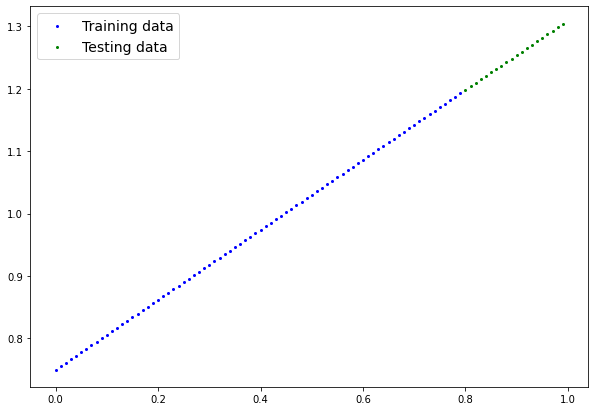

In [44]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test)

In [45]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [48]:
loss_reg = nn.L1Loss()

optim_reg = torch.optim.SGD(model_2.parameters(),lr=0.01)


In [53]:
torch.manual_seed(42)

epochs=1000
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train)
    loss = loss_reg(y_pred, y_train)
    optim_reg.zero_grad()

    loss.backward()

    optim_reg.step()

    model_2.eval()

    with torch.inference_mode():
        # 1.Do the forward pass
        test_pred = model_2(X_test)

        # 2. Calculate the test loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 100==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.00582 | Test_loss: -0.06312
Epoch: 100 | Loss: 0.00612 | Test_loss: -0.06281
Epoch: 200 | Loss: 0.00611 | Test_loss: -0.06286
Epoch: 300 | Loss: 0.00611 | Test_loss: -0.06291
Epoch: 400 | Loss: 0.00610 | Test_loss: -0.06297
Epoch: 500 | Loss: 0.00610 | Test_loss: -0.06303
Epoch: 600 | Loss: 0.00609 | Test_loss: -0.06309
Epoch: 700 | Loss: 0.00580 | Test_loss: -0.06316
Epoch: 800 | Loss: 0.00610 | Test_loss: -0.06286
Epoch: 900 | Loss: 0.00610 | Test_loss: -0.06292


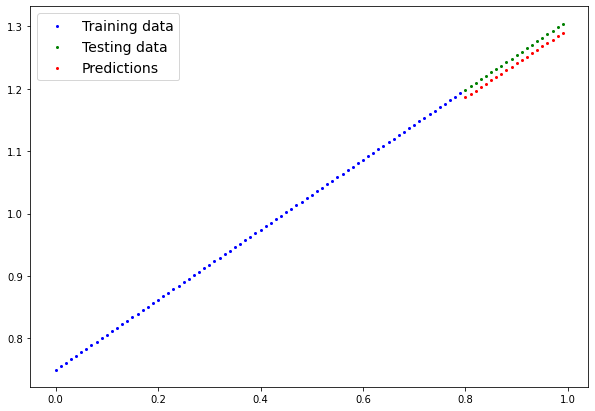

In [56]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test)

plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu())

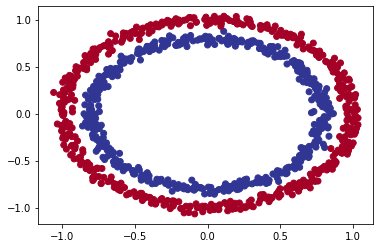

In [62]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [63]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [71]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split = int(0.8*len(X))
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [97]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # non-linear activation function
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) 

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [101]:
loss_fn_3 = nn.BCEWithLogitsLoss()

optimizer_3 = torch.optim.Adam(params=model_3.parameters(),
                            lr=0.1)

In [102]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=150
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_3.train()
    
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn_3(y_logits, 
                   y_train)
    acc = accuracy_func(y_train,
                        y_pred)
    
    optimizer_3.zero_grad()

    loss.backward()

    optimizer_3.step()

    model_1.eval()

    with torch.inference_mode():

        test_logits = model_3(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn_3(test_logits,
                            y_test)
        
        acc_test = accuracy_func(y_test,
                                 test_pred)
        
    if epoch%10==0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {acc_test:.2f}%")


Epoch: 0 | Loss: 0.69050 | Acc: 52.88% | Test loss: 0.68250 | Test acc: 71.00%
Epoch: 10 | Loss: 0.46934 | Acc: 82.62% | Test loss: 0.48859 | Test acc: 76.50%
Epoch: 20 | Loss: 0.11175 | Acc: 99.25% | Test loss: 0.12173 | Test acc: 99.50%
Epoch: 30 | Loss: 0.02379 | Acc: 100.00% | Test loss: 0.04135 | Test acc: 99.00%
Epoch: 40 | Loss: 0.00845 | Acc: 99.88% | Test loss: 0.01702 | Test acc: 100.00%
Epoch: 50 | Loss: 0.00344 | Acc: 100.00% | Test loss: 0.01050 | Test acc: 100.00%
Epoch: 60 | Loss: 0.00210 | Acc: 100.00% | Test loss: 0.00704 | Test acc: 100.00%
Epoch: 70 | Loss: 0.00158 | Acc: 100.00% | Test loss: 0.00651 | Test acc: 100.00%
Epoch: 80 | Loss: 0.00129 | Acc: 100.00% | Test loss: 0.00576 | Test acc: 100.00%
Epoch: 90 | Loss: 0.00112 | Acc: 100.00% | Test loss: 0.00566 | Test acc: 100.00%
Epoch: 100 | Loss: 0.00098 | Acc: 100.00% | Test loss: 0.00581 | Test acc: 100.00%
Epoch: 110 | Loss: 0.00089 | Acc: 100.00% | Test loss: 0.00571 | Test acc: 100.00%
Epoch: 120 | Loss: 0.00

In [79]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

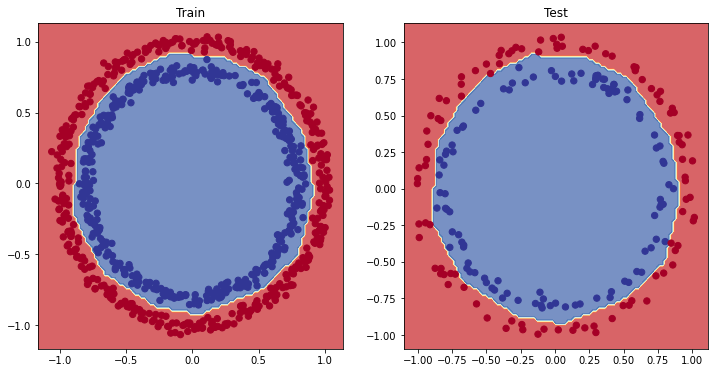

In [103]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [83]:
A = torch.arange(-10,10,1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

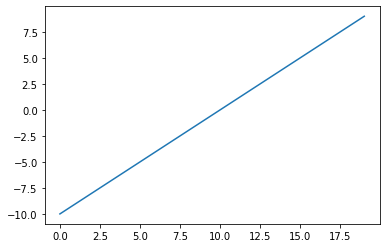

In [84]:
plt.plot(A);

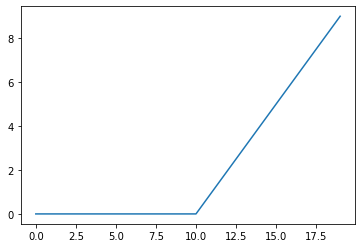

In [85]:
plt.plot(torch.relu(A));

In [86]:
def relu(x:torch.tensor)->torch.tensor:
    return torch.maximum(torch.tensor(0), x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

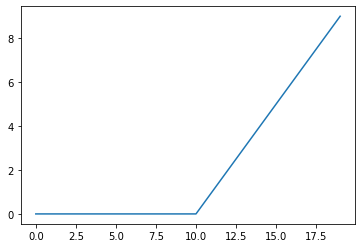

In [88]:
plt.plot(relu(A));

In [91]:
def sigmoid(x:torch.tensor)->torch.tensor:
    return 1/(1+torch.exp(-x))

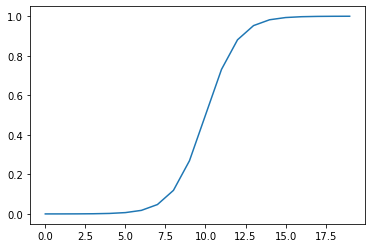

In [93]:
plt.plot(torch.sigmoid(A));

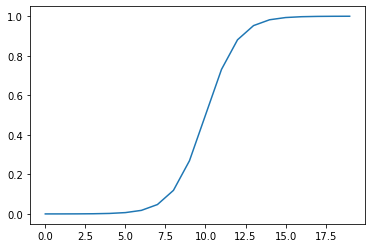

In [94]:
plt.plot(sigmoid(A));

# Multi-class classification(attempt)

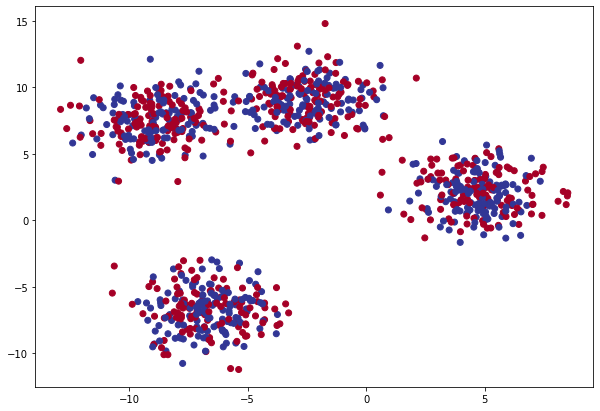

In [131]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blobs, y_blobs = make_blobs(n_samples=1000,
                              n_features=NUM_FEATURES,
                              centers=NUM_CLASS,
                              cluster_std=1.5,
                              random_state=RANDOM_SEED)


X_blobs = torch.from_numpy(X_blobs).type(torch.float)
y_blobs = torch.from_numpy(y_blobs).type(torch.LongTensor)

X_train,X_test, y_train, y_test = train_test_split(X_blobs, y_blobs,test_size=0.2, random_state=42)

plt.figure(figsize=(10,7))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [132]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [133]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)


blob_model = BlobModel(
    input_features=2,
    output_features=4,
    hidden_units=10
).to(device)
blob_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [134]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(blob_model.parameters(), lr=0.1)


In [135]:
X_train[:10], y_train[:10]

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175],
         [ 0.7755,  7.8018],
         [-4.2962,  9.9991],
         [ 3.8225,  2.5719],
         [-7.6469,  5.4421],
         [-3.7474,  8.5322]]), tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0]))

In [136]:
blob_model.eval()
with torch.inference_mode():
    yp = blob_model(X_test.to(device))

yp[:10], y_test[:10]

(tensor([[ 0.2278,  0.3711,  0.8627, -0.3775],
         [-0.1974,  0.1331,  0.1715, -0.1909],
         [ 0.0566,  0.1291,  0.0878, -0.1532],
         [ 0.0073,  0.1208,  0.5334, -0.3750],
         [-0.0646,  0.5400,  0.5424, -0.4671],
         [-0.2360,  0.1630,  0.2006, -0.2212],
         [-0.0572,  0.0332,  0.0267, -0.1793],
         [-0.2211,  0.4117,  0.2884, -0.4357],
         [ 0.0806,  0.1887,  0.1318, -0.1588],
         [-0.1619,  0.4812,  0.3719, -0.4377]], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [137]:
y_pred = torch.softmax(yp, dim=1)
print(yp[:5])
print(y_pred[:5])

tensor([[ 0.2278,  0.3711,  0.8627, -0.3775],
        [-0.1974,  0.1331,  0.1715, -0.1909],
        [ 0.0566,  0.1291,  0.0878, -0.1532],
        [ 0.0073,  0.1208,  0.5334, -0.3750],
        [-0.0646,  0.5400,  0.5424, -0.4671]], device='cuda:0')
tensor([[0.2180, 0.2516, 0.4114, 0.1190],
        [0.2064, 0.2873, 0.2985, 0.2078],
        [0.2553, 0.2744, 0.2633, 0.2069],
        [0.2225, 0.2492, 0.3765, 0.1518],
        [0.1875, 0.3432, 0.3440, 0.1254]], device='cuda:0')


In [138]:
torch.sum(y_pred[0])

tensor(1., device='cuda:0')

In [139]:
y_pred_blobs = torch.argmax(y_pred, dim=1)

In [145]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    blob_model.train()

    y_logits = blob_model(X_train).squeeze()
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_func(y_train,
                      y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    blob_model.eval()

    with torch.inference_mode():
        test_logits = blob_model(X_test).squeeze()

        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy_func(y_test,
                                 test_pred)
    if epoch % 10==0:
        print(f"Epoch: {epoch}| Loss{loss:.5f}, Acc: {acc:.2f}% | Test_loss: {test_loss:.5f},Test_acc: {test_acc:.2f}%")


Epoch: 0| Loss0.02588, Acc: 99.12% | Test_loss: 0.01483,Test_acc: 99.50%
Epoch: 10| Loss0.02583, Acc: 99.12% | Test_loss: 0.01476,Test_acc: 99.50%
Epoch: 20| Loss0.02578, Acc: 99.12% | Test_loss: 0.01471,Test_acc: 99.50%
Epoch: 30| Loss0.02573, Acc: 99.12% | Test_loss: 0.01465,Test_acc: 99.50%
Epoch: 40| Loss0.02568, Acc: 99.25% | Test_loss: 0.01459,Test_acc: 99.50%
Epoch: 50| Loss0.02563, Acc: 99.25% | Test_loss: 0.01453,Test_acc: 99.50%
Epoch: 60| Loss0.02558, Acc: 99.25% | Test_loss: 0.01447,Test_acc: 99.50%
Epoch: 70| Loss0.02553, Acc: 99.25% | Test_loss: 0.01442,Test_acc: 99.50%
Epoch: 80| Loss0.02549, Acc: 99.25% | Test_loss: 0.01437,Test_acc: 99.50%
Epoch: 90| Loss0.02544, Acc: 99.25% | Test_loss: 0.01432,Test_acc: 99.50%


In [148]:
blob_model.eval()
with torch.inference_mode():
    y_logits = blob_model(X_test)
y_logits[:10]

tensor([[  3.8850,  15.6420,  -0.7417, -11.0130],
        [  2.5217,  -7.5674,   0.3046,   9.8148],
        [ -7.1493,  -1.7201,   7.5043,  -0.8723],
        [  0.5207,  10.1859,   1.0461,  -7.9497],
        [ 14.8115,   6.7162,  -9.0674,   0.8841],
        [  2.6780,  -9.1532,   0.5518,  11.6972],
        [ -5.7029,  -1.3202,   6.1111,  -0.8813],
        [ 13.4077,   2.4753,  -8.4696,   3.8771],
        [ -9.4112,  -2.4740,   9.7561,  -0.7272],
        [ 13.8095,   3.6561,  -8.6476,   2.9850]], device='cuda:0')

In [150]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[7.8343e-06, 9.9999e-01, 7.6676e-08, 2.6539e-12],
        [6.7974e-04, 2.8230e-08, 7.4041e-05, 9.9925e-01],
        [4.3243e-07, 9.8573e-05, 9.9967e-01, 2.3011e-04],
        [6.3446e-05, 9.9983e-01, 1.0729e-04, 1.3297e-08],
        [9.9969e-01, 3.0490e-04, 4.2598e-11, 8.9386e-07],
        [1.2104e-04, 8.8048e-10, 1.4440e-05, 9.9986e-01],
        [7.3888e-06, 5.9153e-04, 9.9848e-01, 9.1746e-04],
        [9.9991e-01, 1.7868e-05, 3.1534e-10, 7.2594e-05],
        [4.7398e-09, 4.8814e-06, 9.9997e-01, 2.8000e-05],
        [9.9994e-01, 3.8939e-05, 1.7659e-10, 1.9905e-05]], device='cuda:0')

In [151]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'))

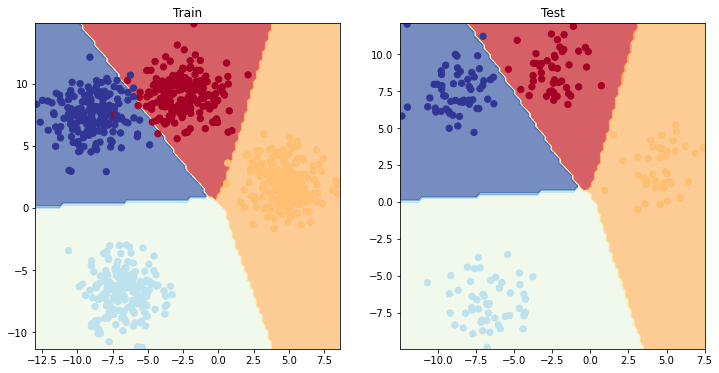

In [152]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(blob_model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(blob_model, X_test, y_test)

# Classification metrics

In [154]:
# !pip install torchmetrics

In [159]:
from torchmetrics import Accuracy

torch_acc = Accuracy(task="multiclass", num_classes=4).to(device)

torch_acc(y_preds, y_test)

tensor(0.9950, device='cuda:0')